# Jane Street Market Predictions

https://www.kaggle.com/c/jane-street-market-prediction/data?select=features.csv (6.1 gb)

This dataset contains an anonymized set of features, feature_{0...129}, representing real stock market data. Each row in the dataset represents a trading opportunity, for which you will be predicting an action value: 1 to make the trade and 0 to pass on it. Each trade has an associated weight and resp, which together represents a return on the trade. The date column is an integer which represents the day of the trade, while ts_id represents a time ordering. In addition to anonymized feature values, you are provided with metadata about the features in features.csv.

In the training set, train.csv, you are provided a resp value, as well as several other resp_{1,2,3,4} values that represent returns over different time horizons. These variables are not included in the test set. Trades with weight = 0 were intentionally included in the dataset for completeness, although such trades will not contribute towards the scoring evaluation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [11]:
pd.set_option("display.max_columns", 1000)

In [4]:
data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [4]:
len(data)

2390491

In [38]:
list(data.columns)

['date',
 'weight',
 'resp_1',
 'resp_2',
 'resp_3',
 'resp_4',
 'resp',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'featu

In [7]:
data['ts_id'].unique()

array([      0,       1,       2, ..., 2390488, 2390489, 2390490])

129 features with seemingly scaled values. The rest of the variables are date, weight, resp_1 -> 4, resp, ts_id.

Maybe do some PCA to reduce the dimensions

In [7]:
data_retype = data.astype('float32')

In [8]:
data_retype[data_retype['weight'] == 0].count()
#409204 values with weight 0.

date           409204
weight         409204
resp_1         409204
resp_2         409204
resp_3         409204
                ...  
feature_126    406843
feature_127    406843
feature_128    408652
feature_129    408652
ts_id          409204
Length: 138, dtype: int64

## EDA

In [10]:
len(data['date'].unique())

500

In [13]:
data[data['date'] == 0]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,0,33.114851,0.009417,0.009417,0.009417,0.012766,0.012787,1,-0.259037,-0.391882,...,-1.968269,-0.961742,1.604044,-1.507539,-1.163956,-1.921212,0.353259,-1.306408,1.087192,5582
5583,0,24.717850,0.005481,0.005481,0.005481,0.003882,0.003893,1,1.708366,1.313385,...,-2.445579,0.520711,7.055120,-1.641776,-1.425923,-2.048651,0.391530,-0.424127,3.803231,5583
5584,0,0.935702,0.009550,0.009550,0.009550,-0.000932,0.001002,1,0.187393,-0.965020,...,-1.924877,0.858199,0.657809,-0.197027,-1.832238,0.322328,-0.308901,1.045401,0.740898,5584
5585,0,0.474089,0.004016,0.004016,0.004016,0.005888,0.006608,1,2.481597,1.769018,...,-2.964383,0.347743,0.879486,-0.849308,-2.858006,-0.802849,-1.217617,0.173027,0.492465,5585


In [14]:
5587*500 #each date does not have the same number of entries

2793500

In [20]:
num_entries_by_date = [len(data[data['date'] == i]) for i in range(500)]
num_entries_by_date[:5]

[5587, 9401, 231, 7221, 10305]

Text(0, 0.5, '% count')

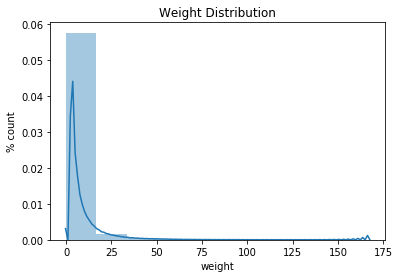

In [82]:
sns.distplot(data['weight'], bins = 10)
plt.title('Weight Distribution')
plt.ylabel('% count')

In [86]:
corr = data.corr()

In [87]:
corr[corr > 0.8]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
date,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998994
weight,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_1,NaN,NaN,1.000000,0.890214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_2,NaN,NaN,0.890214,1.000000,0.823383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_3,NaN,NaN,NaN,0.823383,1.000000,0.805952,0.815972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [88]:
# Create correlation matrix
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  #change value if needed
corr.drop(columns=to_drop,inplace = True) #put inplace or not inplace for finalizing drops

In [89]:
to_drop

['resp_2',
 'resp',
 'feature_2',
 'feature_4',
 'feature_6',
 'feature_8',
 'feature_12',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_18',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_28',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_38',
 'feature_40',
 'feature_49',
 'feature_57',
 'feature_58',
 'feature_61',
 'feature_63',
 'feature_66',
 'feature_68',
 'feature_69',
 'feature_71',
 'feature_76',
 'feature_82',
 'feature_88',
 'feature_96',
 'feature_100',
 'feature_101',
 'feature_102',
 'feature_107',
 'feature_108',
 'feature_110',
 'feature_112',
 'feature_113',
 'feature_114',
 'feature_116',
 'feature_117',
 'feature_119',
 'feature_122',
 'feature_124',
 'feature_125',
 'feature_126',
 'feature_127',
 'feature_128',
 'feature_129',
 'ts_id']

In [90]:
len(to_drop)

61

In [ ]:
#half of the features rae highly correlated as well

In [59]:
data[data.isna().any(axis=1)]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388651,499,2.264498,-0.006526,-0.008415,-0.009959,-0.013630,-0.010143,1,0.385160,1.249488,...,0.599042,-1.402120,-1.202299,-0.805827,-0.147557,-1.527314,-0.676699,-1.067993,-0.061834,2388651
2388652,499,0.854326,0.001404,0.001671,0.002892,0.003725,0.002798,-1,2.236957,5.200366,...,0.536195,-0.549446,-0.590197,-0.510284,-1.001467,-0.807381,-0.817683,-0.674044,-0.670450,2388652
2388653,499,0.000000,0.002844,0.003414,0.003644,0.007773,0.009395,1,0.953931,2.145362,...,-0.982812,0.844311,0.394465,-0.079544,-1.766809,-0.105212,-1.285125,0.228021,-0.627913,2388653
2388654,499,0.201782,0.000489,0.000386,-0.000317,-0.000723,0.000223,-1,-0.287723,0.804961,...,1.387610,-1.598082,0.008965,-1.158200,0.548124,-1.942958,0.281434,-1.695229,0.251207,2388654


In [ ]:
#~400k rows with missing data

In [60]:
na_df = data[data.isnull()]

In [64]:
sns.heatmap(data, mask = na_df)

KeyboardInterrupt: 

In [65]:
data.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,...,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,...,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01,1.195245e+06
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02,9.999518e-01,2.559373e+00,2.477335e+00,...,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00,6.900755e+05
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00,0.000000e+00
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03,-1.000000e+00,-1.299334e+00,-1.263628e+00,...,-1.123252e+00,-1.114326e+00,-9.512009e-01,-9.133750e-01,-1.212124e+00,-1.452912e+00,-8.993050e-01,-1.278341e+00,-8.544535e-01,5.976225e+05
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05,1.000000e+00,-1.870182e-05,-7.200577e-07,...,0.000000e+00,7.006233e-17,6.054629e-17,4.870826e-17,-2.558675e-16,1.015055e-16,5.419920e-17,8.563069e-17,4.869529e-17,1.195245e+06
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03,1.000000e+00,1.578417e+00,1.526399e+00,...,1.342829e+00,1.405926e+00,1.308625e+00,1.228277e+00,1.409687e+00,1.767275e+00,1.111491e+00,1.582633e+00,1.125321e+00,1.792868e+06
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390490e+06


### Graph response variables

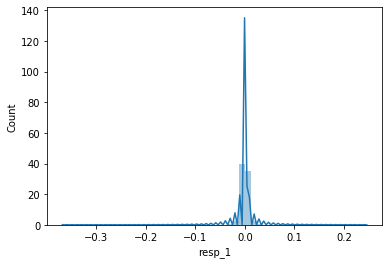

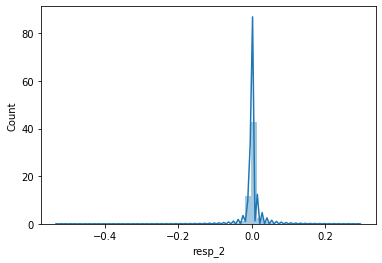

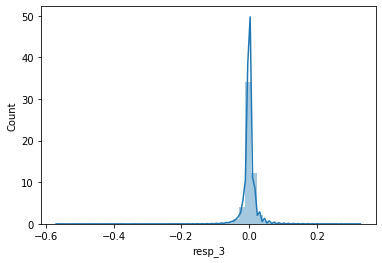

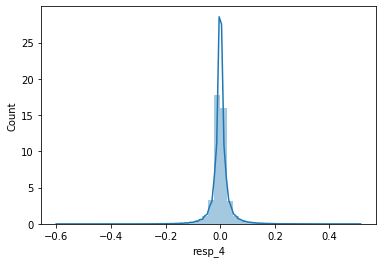

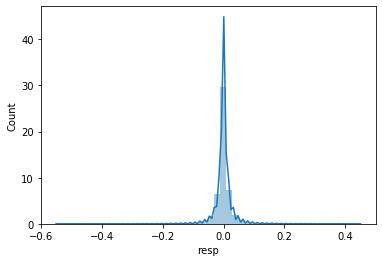

In [77]:
list_var = ['resp_1','resp_2','resp_3','resp_4','resp']
for var in list_var:
    sns.distplot(data[var])
    plt.ylabel('Count')
    plt.show()

In [172]:
series1 = data.iloc[:,2] + data.iloc[:,3] + data.iloc[:,4] + data.iloc[:,5]

In [173]:
series2 = (data.iloc[:,2] + data.iloc[:,3] + data.iloc[:,4] + data.iloc[:,5])/4

In [174]:
resp_series = data['resp']

In [ ]:
#series are not of averages or sums. plot series

Text(0.5, 1.0, 'Every transaction')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


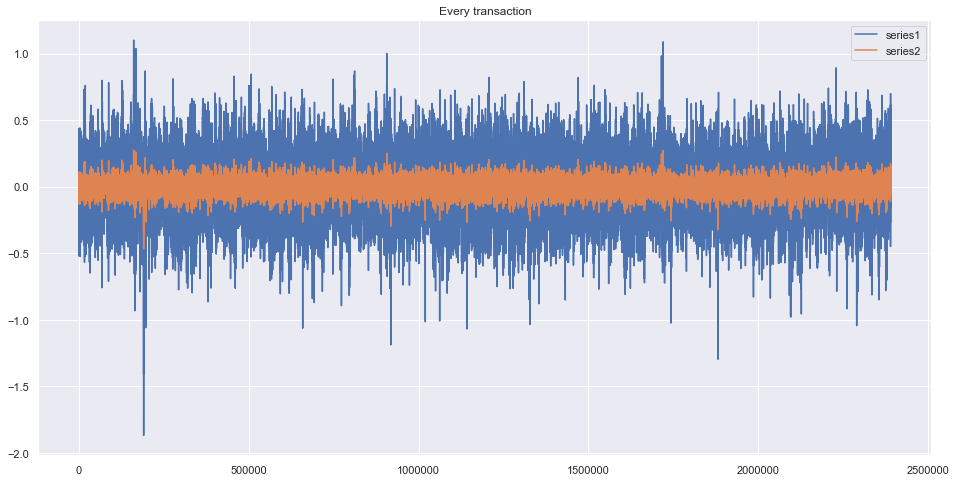

In [192]:
series1.plot()
series2.plot()
plt.legend(['series1','series2','resp_series'])
plt.title('Every transaction')

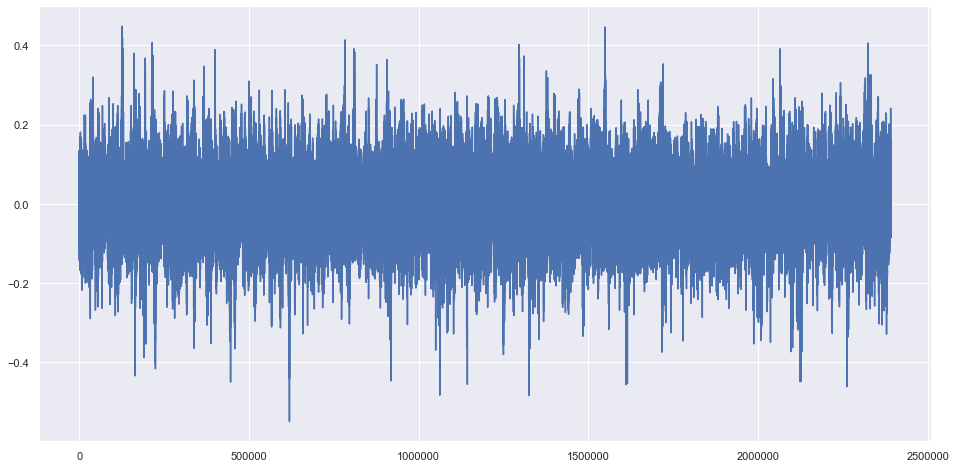

In [191]:
plt.plot(resp.mean())
resp_series.plot()

In [5]:
data_retype = data.astype('float32')

In [6]:
data_retype.dtypes

date           float32
weight         float32
resp_1         float32
resp_2         float32
resp_3         float32
                ...   
feature_126    float32
feature_127    float32
feature_128    float32
feature_129    float32
ts_id          float32
Length: 138, dtype: object

In [82]:
data_retype.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0.0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1.0,-1.872746,-2.191242,...,NaN,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807,0.0
1,0.0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1.0,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684,1.0
2,0.0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1.0,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2.0
3,0.0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1.0,1.174379,0.344640,...,NaN,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469,3.0
4,0.0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1.0,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4.0


In [83]:
data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [105]:
print(data.info())
print('--')
print(data_retype.info())
#retype uses half the amount of memory so will probably be faster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB
None
--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float32(138)
memory usage: 1.2 GB
None


In [109]:
data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,-1.055090,NaN,NaN,-2.667671,-2.001475,-1.703595,-2.196892,NaN,NaN,1.483295,1.307466,NaN,NaN,1.175200,0.967805,1.608410,1.319365,NaN,NaN,-0.515073,-0.448988,NaN,NaN,-2.429812,-2.206423,-3.593120,-2.868358,0.112697,0.053157,-0.539956,-0.692187,3.491282,-1.684889,1.337123,-0.328607,1.689207,-1.052243,-1.870885,-1.789342,-1.574173,-1.120820,-0.571920,-1.093033,0.703515,5.936281,NaN,3.315812,1.291338,2.468825,2.490069,-1.148239,-0.961935,-2.263944,-2.158765,-5.012022,-2.006825,-1.284090,-2.141697,-2.054935,-1.851203,-1.431184,-1.634481,NaN,-0.373934,NaN,0.559241,0.891368,0.271700,NaN,-1.521125,NaN,3.045337,3.260512,0.683558,NaN,-0.109194,NaN,0.488806,1.447504,-2.790902,NaN,1.158770,NaN,3.754522,7.137163,-1.863069,NaN,0.434466,NaN,-0.292035,0.317003,-2.605820,NaN,2.896986,NaN,1.485813,4.147254,-2.238831,NaN,-0.892724,NaN,-0.156332,0.622816,-3.921523,NaN,2.561593,NaN,3.457757,6.649580,-1.472686,NaN,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,-0.384952,NaN,NaN,1.225838,0.789076,1.110580,1.102281,NaN,NaN,-0.590600,-0.625682,NaN,NaN,-0.543425,-0.547486,-0.706600,-0.667806,NaN,NaN,0.910558,0.914465,NaN,NaN,2.137454,2.080459,2.819291,2.483965,-0.086755,-0.082687,0.368431,0.469196,5.711996,-2.215132,0.796703,-1.140081,0.716617,-0.059431,-0.198920,-0.326697,-0.381770,1.435607,3.401393,2.486748,-2.014598,-0.390588,NaN,-0.027262,-1.886927,-1.706450,-0.888236,-1.138294,-0.954461,-1.350633,-1.459546,-4.564815,-2.651966,-1.620014,-2.240625,-2.147273,-0.255224,3.202946,-0.535872,NaN,-0.050948,NaN,0.141089,0.058363,0.131190,NaN,-0.121239,NaN,0.677553,0.045842,-0.124616,NaN,-0.007004,NaN,-0.410491,-0.024323,-3.012654,NaN,1.157671,NaN,1.297679,1.281956,-2.427595,NaN,0.024913,NaN,-0.413607,-0.073672,-2.434546,NaN,0.949879,NaN,0.724655,1.622137,-2.209020,NaN,-1.332492,NaN,-0.586619,-1.040491,-3.946097,NaN,0.983440,NaN,1.357907,1.612348,-1.664544,NaN,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,5.448261,2.668029,NaN,NaN,3.836342,2.183258,3.902698,3.045431,NaN,NaN,-1.141082,-0.979962,NaN,NaN,-1.157585,-0.966803,

In [116]:
day_0 = data[data['date'] == 0]

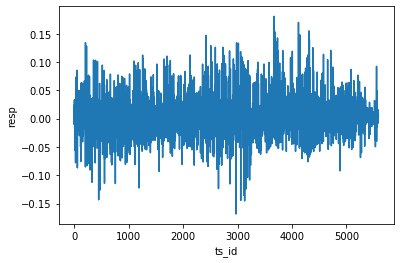

In [125]:
sns.lineplot(day_0['ts_id'], day_0['resp'])

In [114]:
data[data['date'] == 1]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
5587,1,9.821427,-0.014818,-0.019394,-0.019283,-0.000944,-0.007844,1,5.285973,3.011525,-1.393305,-0.735402,-0.908020,-0.471151,NaN,NaN,5.039879,2.003304,NaN,NaN,3.888114,1.897805,2.326891,1.192483,NaN,NaN,4.356158,3.063248,NaN,NaN,4.148956,3.256711,4.659288,3.250720,NaN,NaN,-0.854551,-0.568027,NaN,NaN,-0.660888,-0.274186,-1.277772,-0.527364,0.699076,0.345497,-1.131117,-1.088059,-0.009942,0.968738,3.041466,-0.094376,0.177354,6.063898,5.705928,5.807039,3.480563,6.057975,2.591198,3.397272,4.420471,4.405561,NaN,1.010000,1.435991,2.603187,2.518442,-1.282725,-1.074375,-3.135296,-2.999245,-5.801964,-1.706559,-1.125912,-2.143324,-2.055502,2.758929,2.188982,0.820058,NaN,-0.810868,NaN,-0.688336,-0.145719,0.368667,NaN,-1.002154,NaN,-1.399374,-0.126828,0.488963,NaN,-1.238212,NaN,-0.000088,0.490981,-2.279363,NaN,-1.515613,NaN,0.318745,0.637013,-2.433448,NaN,0.922601,NaN,0.577809,0.439945,-2.204590,NaN,1.249999,NaN,1.205414,1.116665,-2.806147,NaN,-0.479490,NaN,0.172390,-0.016806,-3.116017,NaN,0.265058,NaN,1.135212,0.882452,-1.872665,NaN,NaN,4.728494,5.309723,3.199164,4.911131,4.783926,4.397508,5.122683,4.998204,5587
5588,1,0.838150,-0.002198,-0.002562,-0.016964,-0.029155,-0.025479,1,-3.172026,-3.093182,1.068607,0.506972,1.252115,0.665742,NaN,NaN,-5.424993,-3.081836,NaN,NaN,7.689749,4.512754,0.984244,-0.016600,NaN,NaN,1.158439,0.607663,NaN,NaN,8.307519,6.775615,1.862624,1.058943,NaN,NaN,-3.362551,-3.193465,NaN,NaN,-2.723351,-2.084566,-4.988619,-3.479194,1.580078,0.996742,-0.299974,-0.338265,1.112318,-0.069087,2.804462,0.489781,3.365059,0.367579,-0.397771,-0.767208,-0.916211,0.665556,-0.198657,2.753351,1.357135,2.489372,NaN,1.152595,0.437353,1.685083,2.875018,-3.209168,-2.633145,-1.169138,-1.262263,-4.858032,-1.596885,-1.065058,-2.589573,-2.465843,-2.810803,-3.467993,-2.050142,NaN,0.499225,NaN,-1.175486,0.367653,-0.061980,NaN,2.327340,NaN,-7.546801,1.754285,-1.298134,NaN,0.459597,NaN,0.721250,0.652136,-2.962642,NaN,5.110923,NaN,5.589854,5.105871,-1.844534,NaN,-0.412149,NaN,1.322766,0.139397,-2.070829,NaN,-0.027765,NaN,11.161628,4.178262,-1.028454,NaN,-1.133088,NaN,0.814667,-0.193307,-3.457956,NaN,2.775705,NaN,10.258894,5.395499,-0.995543,NaN,NaN,1.998274,3.805928,3.327486,8.298933,4.331993,6.636454,2.742866,4.421242,5588
5589,1,0.115654,0.025969,0.033227,0.026518,-0.007137,0.005205,-1,-1.995780,-2.397085,0.631661,0.260796,-0.606878,-0.318215,NaN,NaN,0.204725,-0.701564,NaN,NaN,-0.603418,-0.861179,0.439080,-0.598599,NaN,NaN,-0.890208,-0.646109,NaN,NaN,-0.886307,-0.570991,-

In [133]:
aggregate_day_return = data[['date','resp']].groupby('date').sum()
aggregate_day_return.head()

,resp
date,
0,12.764341
1,-11.235455
2,0.176875
3,-10.132756
4,3.442627


Text(0, 0.5, 'return')

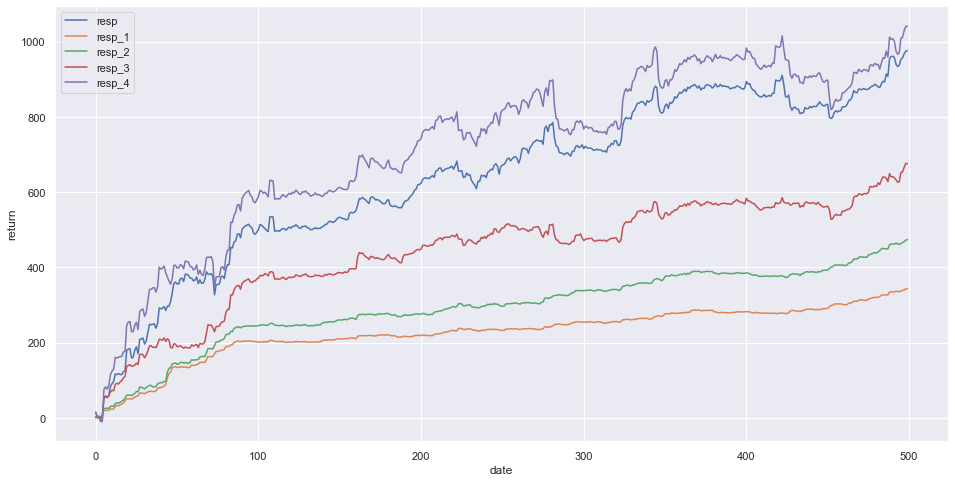

In [159]:
sns.set(rc={'figure.figsize':(16,8)})

features = ['resp','resp_1','resp_2','resp_3','resp_4']
for feature in features:
    aggregate_day_return = data[['date',feature]].groupby('date').sum()
    
    sns.lineplot(aggregate_day_return[feature].cumsum().index, aggregate_day_return[feature].cumsum())
    
    plt.legend(features)
    
plt.ylabel('return')

In [ ]:
#resp_4 and resp are very similiar
#resp_1 and 2 are very similar as well

In [178]:
differenced = data['resp_4'] - data['resp']

In [180]:
differenced.mean() #extremely small means

2.6708786855871132e-05

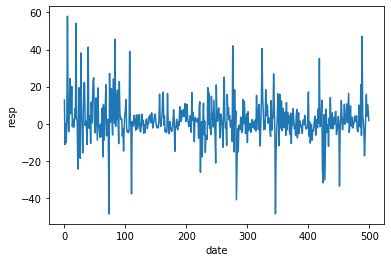

In [138]:
sns.lineplot(aggregate_day_return['resp'].index, aggregate_day_return['resp'])

weights

In [197]:
data_retype['weight'].describe()

count    2.390491e+06
mean     3.027627e+00
std      7.665237e+00
min      0.000000e+00
25%      1.617400e-01
50%      7.086770e-01
75%      2.471791e+00
max      1.672937e+02
Name: weight, dtype: float64

In [199]:
data_retype[data_retype['weight'] == 0].count()
#409204 values with weight 0.

date           409204
weight         409204
resp_1         409204
resp_2         409204
resp_3         409204
                ...  
feature_126    406843
feature_127    406843
feature_128    408652
feature_129    408652
ts_id          409204
Length: 138, dtype: int64

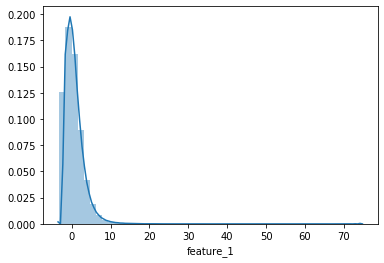

In [8]:
sns.distplot(data_retype['feature_1'])

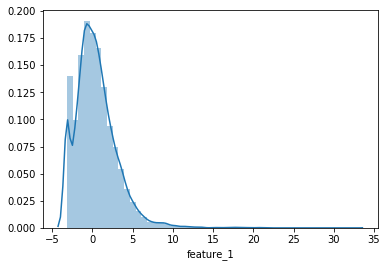

In [100]:
sns.distplot(data_retype[data_retype['date'] == 4]['feature_1'])

  Features 1 has a right skew graph and each specific day follows almost the same way

In [9]:
day_zero = data_retype[data_retype['date'] == 0]

In [12]:
day_zero.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,5587.0,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,4787.000000,4787.000000,5585.000000,5585.000000,5401.000000,5401.000000,5553.000000,5553.000000,5571.000000,5571.000000,4784.000000,4784.000000,5585.000000,5585.000000,5399.000000,5399.000000,5553.000000,5553.000000,5571.000000,5571.000000,4784.000000,4784.000000,5585.000000,5585.000000,5399.000000,5399.000000,5553.000000,5553.000000,5571.000000,5571.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5441.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,4871.000000,5585.000000,5435.000000,5553.000000,5571.000000,5587.000000,5437.000000,5437.000000,5587.000000,5587.000000,5552.000000,5552.000000,5566.000000,5566.000000,5583.000000,5583.000000,5587.000000
mean,0.0,2.004708,0.000020,0.000036,0.000460,0.002755,0.002285,0.020226,0.704026,-0.595924,0.102204,0.017371,0.111686,0.042895,0.169014,-0.085089,0.855091,-0.367322,0.249185,-0.225808,0.505852,-0.261926,0.637425,-0.470387,0.178181,0.026680,0.414202,0.121306,0.347006,0.098755,0.403261,0.137059,0.420384,0.128852,0.238670,0.113446,0.503685,0.229105,0.331015,0.150020,0.476826,0.229391,0.573047,0.258229,0.084708,0.006879,0.101551,0.041353,0.102501,1.908443,3.259093,-0.019873,0.410593,1.428118,1.904819,1.322131,0.408803,0.969456,0.108972,0.117611,1.083600,-0.231932,0.733478,0.902013,0.806883,0.872013,0.893296,1.142852,1.090748,-0.140457,-0.152008,0.543452,0.176978,0.270491,1.276165,1.258971,0.749954,-0.558203,-0.428294,0.281670,0.033548,0.162713,0.088078,0.082058,0.444047,0.250930,-0.032187,0.129141,0.047720,0.007261,0.134547,0.274864,

IndexError: index 17 is out of bounds for axis 0 with size 17

<Figure size 432x288 with 0 Axes>

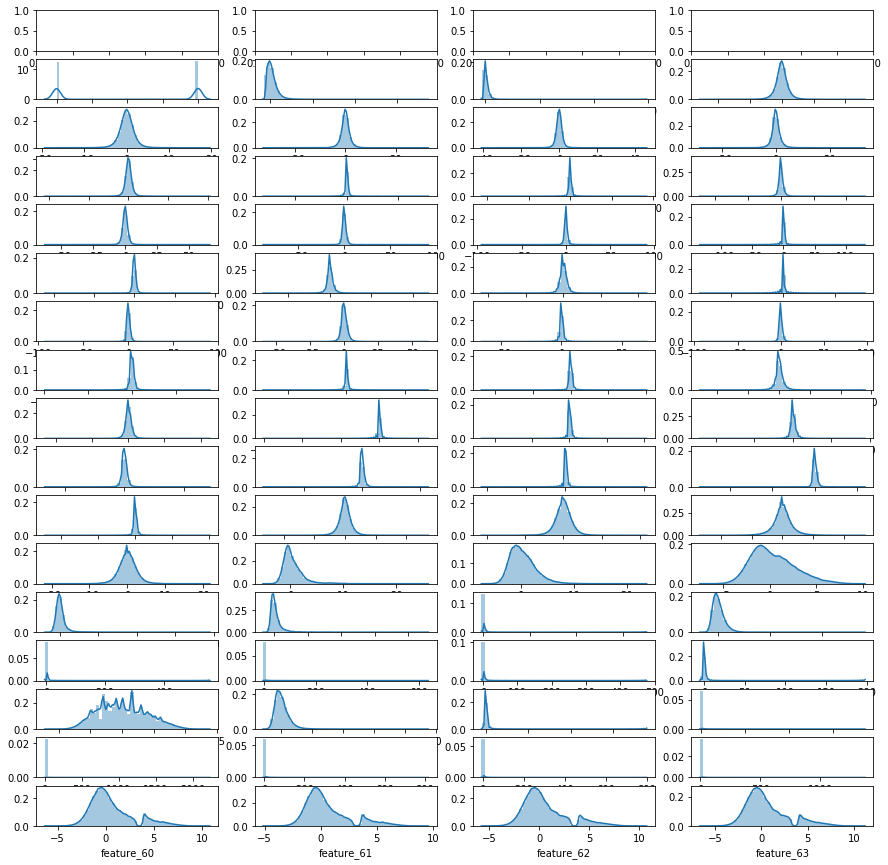

In [79]:
plt.clf()

fig, ax = plt.subplots(17,4, figsize = (15,15))

x_counter = 0
y_counter = 0

for index in range(64):

    feature = 'feature_' + str(index)

    if index % 4 == 0:
        #if it is ready to skip a new line or not
        y_counter += 1
        x_counter = 0       
        
    sns.distplot(data_retype[feature], ax = ax[y_counter,x_counter])  
#     plt.title(feature)
    
    x_counter += 1

plt.show()

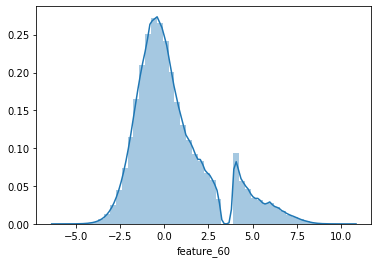

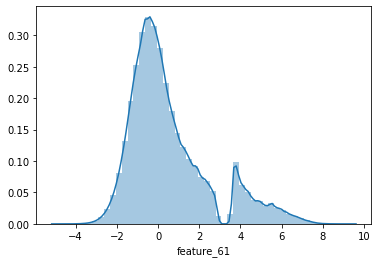

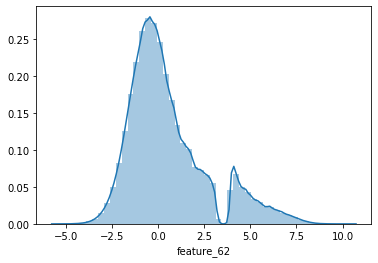

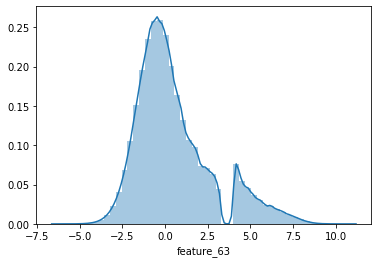

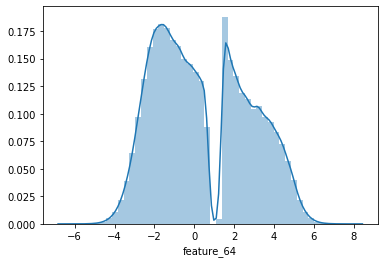

In [97]:
for index in range(60,65):
    feature = 'feature_' + str(index)
    sns.distplot(data_retype[feature])
    plt.show()

Features 60-64 look similar. 61 & 63 look *EXACTLY* the same while 62 would be the same except is shifted by 0.5.



Feature 64 is shifted and has a different peak

IndexError: index 17 is out of bounds for axis 0 with size 17

<Figure size 432x288 with 0 Axes>

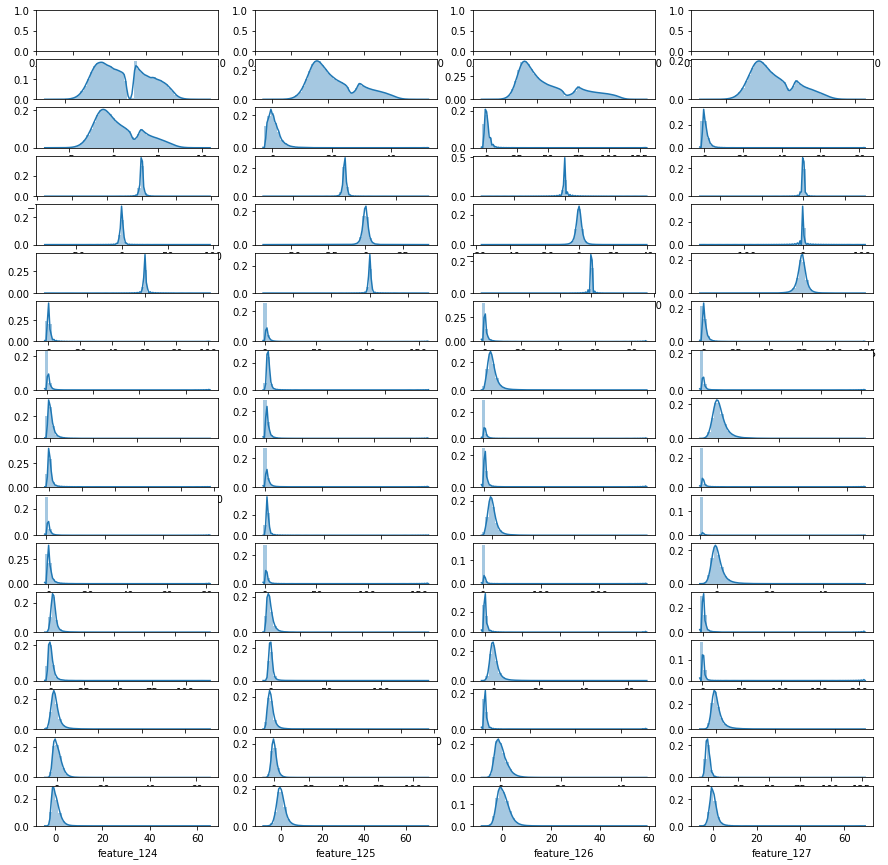

In [94]:
plt.clf()

fig, ax = plt.subplots(17,4, figsize = (15,15))

x_counter = 0
y_counter = 0

for index in range(64,129):

    feature = 'feature_' + str(index)

    if index % 4 == 0:
        #if it is ready to skip a new line or not
        y_counter += 1
        x_counter = 0       
        
    sns.distplot(data_retype[feature], ax = ax[y_counter,x_counter])  
#     plt.title(feature)
    
    x_counter += 1

plt.show()

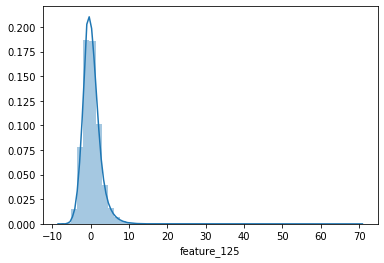

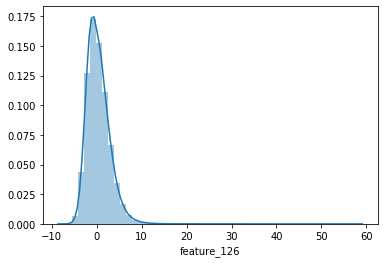

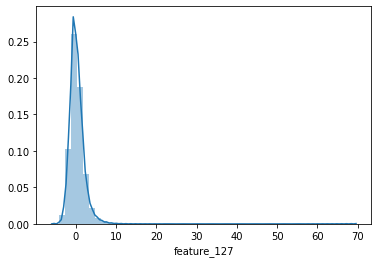

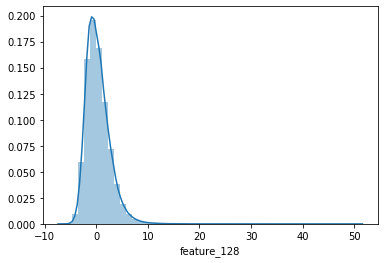

In [95]:
for index in range(125,129):
    feature = 'feature_' + str(index)
    sns.distplot(data_retype[feature])
    plt.show()